# Interpolation and Curve Fitting

## Table of Contents

- [i. Linear Interpolation](#Linear-Interpolation)
- [ii. Lagrange polynomial](#Lagrange-polynomial)
- [iii. Newton polynomial](#Newton-polynomial)
- [iv. Linear Regression](#Linear-Curve-Fitting-(Linear-Regression))
- [v. Polynomial Regression](#Polynomial-Curve-Fitting)
- [vi. SciPy Interpolation](#SciPy-Interpolation)
- [vii. Scipy Curve Fitting](#Scipy-Curve-Fitting)

## Linear Interpolation

Linear interpolation is a method of estimating a value between two known data points on a *straight line* or a *linear curve*. In other words, it is a way to find an **approximate value** of a function at a point between two known data points by assuming that the *function is linear* between those points

If the two known points are given by the coordinates $(x_{0},y_{0})$ and $(x_{1},y_{1})$, the linear interpolant is the straight line between these points. For a value $x$ in the interval $(x_{0},x_{1})$, the value $y$ along the straight line is given from the equation of slopes. 

$$ \frac{y - y_0}{x - x_0} = \frac{y_1 - y_0}{x_1 - x_0} 
$$

solving for y,
$$
\begin{align} 
y &= y_0 + (x-x_0)\frac{y_1 - y_0}{x_1 - x_0} 
\end{align}
$$
which is the formula for linear interpolation in the interval $(x_{0},x_{1})$.
Outside this interval, the formula is identical to **linear extrapolation**.

The linear interpolation method has a **disadvantage** in that it completely *ignores all data points except the two adjacent* to the required point. This means that the overall trend of the curve that passes through all the data points is not considered, and as a result, the interpolated point may not accurately lie on that curve.

**EXAMPLE:** here's a simple example to illustrate linear interpolation:

Suppose you have a set of data points representing the temperature at different times of the day:

    Time(h)	Temperature (°C)
        0    	20
        4   	16
        8   	22
        12  	28
        16  	24
        20  	18

In [1]:
X = [0,4,8,12,16,20]  # known data points for x
Y = [20,16,22,28,24,18]  # known data points for y

def linear_interpolate(X_p, X, Y):
    Y_p = []
    for x_p in X_p:
        for i in range(len(X)):
            if x_p <= X[i]:
                Y_p.append(Y[i-1] + (x_p - X[i-1])*(Y[i] - Y[i-1])/(X[i] - X[i-1]))  # linear interpolation formula
                break
        else:
            raise ValueError('Out of Range!')  # raise error if x_p is outside the range of X
    return Y_p

linear_interpolate([0, 2, 4, 6, 8, 14, 16, 20], X, Y)  # estimate y at x = 14 using linear interpolation

[20.0, 18.0, 16.0, 19.0, 22.0, 26.0, 24.0, 18.0]

So, what does the below function do?!

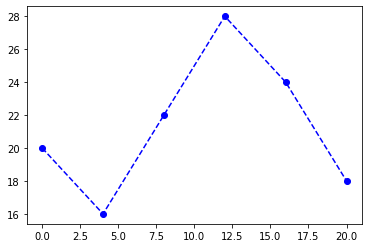

In [2]:
import matplotlib.pyplot as plt

plt.plot(X,Y, 'bo--');

It does something like this,

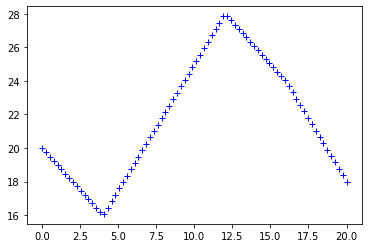

In [3]:
import numpy as np

x = np.array(X)
y = np.array(Y)

x_interp = np.linspace(x.min(), x.max(), 80)  # produces other points between max and min of the X data
y_interp = linear_interpolate(x_interp, x,y)  # finds the corresponding interpolated values of each point
plt.plot(x_interp, y_interp, 'b+')

----

## Lagrange polynomial

The **Lagrange Interpolation Polynomial** is a polynomial function that can be used to interpolate a set of data points in order to approximate the value of a function at a point within a given interval. The polynomial is constructed using the **Lagrange basis functions**, which are a *set of polynomial functions* that are used to interpolate the data points.

Suppose we have a set of n + 1 distinct data points (x0, y0), (x1, y1), ..., (xn, yn), and we wish to find a polynomial function P(x) that approximates the value of a function f(x) at a point x within the interval $[x_0, x_n]$. The Lagrange Interpolation Polynomial is given by:

$$
P(x) = \sum_{i=0}^n y_i \cdot l_i(x) = \sum_{i=0}^n y_i \cdot \prod_{\substack{j=0 \\ j\neq i}}^n \frac{x-x_j}{x_i-x_j}
$$
where $y_i$ is the value of the function $f(x)$ at the $i$-th data point $(x_i, y_i)$, and $l_i(x)$ is the $i$-th Lagrange basis polynomial.

**Algorithm:**


```
1. Initialize P(x) to zero (P(x) = 0).
2. For i = 0 to n, do steps 3-4.
    3. Compute the value of the Lagrange basis polynomial li(x) for i = 0, 1, ..., n using the formula:
    4. li(x) = Π[j=0 to n, j ≠ i] (x - xj) / (xi - xj)
5. Update P(x) by adding the term yi * li(x) for i = 0, 1, ..., n using the formula:
6. P(x) = Σ[i=0 to n] yi * li(x)
7. Return the value of P(x) as the approximation of f(x) at the point x.
```

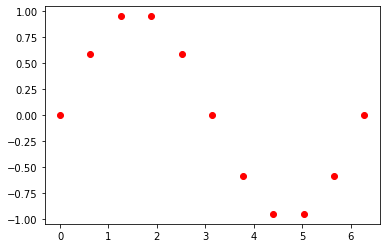

In [4]:
# DATA Points
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 360, 11) * np.pi /180
y = np.sin(x)
plt.plot(x,y, 'ro');

In [5]:
def lagrange_poly(Xp, x, y):
    
    # Compute the number of data points
    m = len(x) + 1
    n = m - 1
    
    # Initialize the list of computed values
    yp = []
    
    # Loop over each evaluation point
    for xp in Xp:
        # Initialize the value of the Lagrange Interpolation Polynomial
        Px = 0
        
        # Loop over each data point to compute the Lagrange basis polynomial
        for i in range(n):
            # Initialize the value of the Lagrange basis polynomial
            l = 1
            
            # Compute the product of the factors in the Lagrange basis polynomial
            for j in range(n):
                if j == i:
                    continue
                l *= (xp - x[j])/(x[i] - x[j])
            
            # Update the value of the Lagrange Interpolation Polynomial
            Px += y[i] * l
        
        # Append the computed value of the Lagrange Interpolation Polynomial to the list
        yp.append(round(Px, 4))
    
    # Return the list of computed values
    return yp

In [6]:
xp = [30*np.pi/180, 90*np.pi/180, 270*np.pi/180]
lagrange_poly(xp, x, y)

[0.5, 1.0, -1.0]

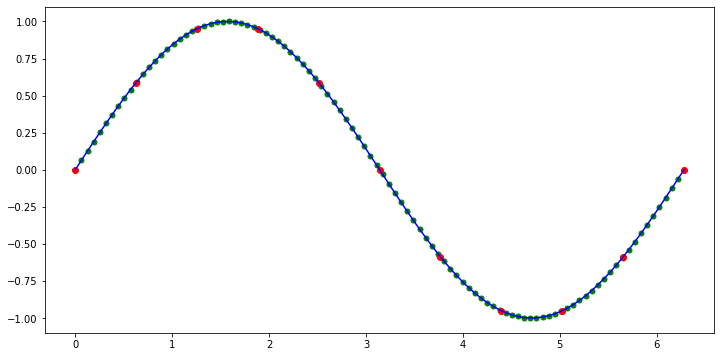

In [7]:
x_interp = np.linspace(0,360,100)*np.pi/180
y_interp = lagrange_poly(x_interp, x, y)

plt.figure(figsize=(12,6))

plt.plot(x_interp, y_interp,'go', ms=5)
plt.plot(x, y, 'ro')
plt.plot(x_interp, y_interp, 'b');

Does a pretty well job!

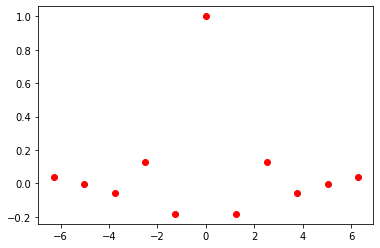

In [8]:
# new data points
x = np.linspace(-360, 360, 11)*np.pi/180
y = np.sinc(x)
plt.plot(x,y, 'ro');

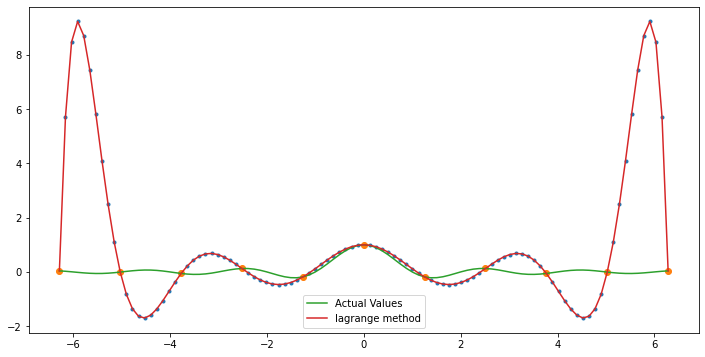

In [9]:
x_interp = np.linspace(-360, 360, 101)*np.pi/180
y_interp = lagrange_poly(x_interp, x, y)

plt.figure(figsize=(12,6))

plt.plot(x_interp, y_interp,'o', ms=3)
plt.plot(x, y, 'o')
plt.plot(x_interp, np.sinc(x_interp), label= 'Actual Values')
plt.plot(x_interp, y_interp, label='lagrange method')

plt.legend();

The Lagrange Interpolation Polynomial has some **disadvantages** compared to other interpolation methods, such as Newton's divided differences.

* One major disadvantage is that the Lagrange Interpolation Polynomial can be numerically unstable when the degree of the polynomial is high or the data points are closely spaced. This is because the Lagrange basis polynomials involve dividing by small differences between the data points, which **can amplify rounding errors and lead to inaccurate results**. This is known as the **Runge's phenomenon**, which causes **oscillations in the interpolated polynomial near the edges of the interval**.

* Another disadvantage is that the Lagrange Interpolation Polynomial can be **computationally expensive** for large data sets because it requires computing the Lagrange basis polynomials for each data point at each evaluation point. This can result in a time complexity of **$O(n^2)$** for n data points, which can be slow for very large n.

To overcome these disadvantages, alternative interpolation methods such as **Newton's divided differences** or **cubic splines** can be used, which are more stable and computationally efficient.

-----

## Newton polynomial

The **Newton Interpolation** Method is another common method for interpolating a set of data points with a polynomial function. It is similar to the Lagrange Interpolation Method but uses a different approach to construct the interpolating polynomial.

The Newton Interpolation Method constructs the interpolating polynomial using a **divided difference table**, which is a table of divided differences of the data points. The divided differences are *recursively* computed from the data points and used to construct the ***coefficients of the polynomial***.

The divided difference table is a matrix D with entries:

$$D_{i,0} = y_j$$

and, for j > 0,

$$D_{i,j+1} = \frac{D_{i, j} - D_{j, j}}{x_{i} - x_j}$$

The interpolating polynomial is given by:

$$P(x) = D_{0,0} + \sum_{i=1}^n D_{i,i} \prod_{j=0}^{i-1} (x - x_j)$$

where $D_{0,0}, D_{1,1}, \ldots, D_{n,n}$ are the coefficients of the polynomial.

This can be achieved in **two steps**.  
The first step is the ***divided differences procedure*** and used to calculated the coefficients of the polynomial.  
The second is simple ***substitution of values of a given x*** into the polynomial to get the interpolated y.

Here's how to construct the divided difference table D for a set of n+1 data points (x0, y0), (x1, y1), ..., (xn, yn):

1. Initialize the divided difference table D as an n x n matrix with all entries equal to zero. The matrix D has n rows and n columns because the first column is already filled with the y-values of the data points.

$$ D = \begin{bmatrix}
0 & 0 & 0 & \cdots & 0 \\
0 & 0 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 0
\end{bmatrix} $$

2. Set the first column of D to the y-values of the data points.

$$ D = \begin{bmatrix}
y_0 & 0 & 0 & \cdots & 0 \\
y_1 & 0 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
y_n & 0 & 0 & \cdots & 0
\end{bmatrix} $$

3. For j = 0 to n, compute the jth column of D recursively using the formula:

$$D_{i,j+1} = \frac{D_{i, j} - D_{j, j}}{x_{i} - x_j}$$

where i = j+1, j+2, ..., n+1.

To compute the first entry in the jth column, we have:

$$ D_{j,j} = \frac{D_{j,j-1} - D_{j-1,j-1}}{x_{j} - x_{j-1}} $$

and so on, until we compute the last entry in the jth column:

$$ D_{n,j} = \frac{D_{n,j-1} - D_{j-1,j-1}}{x_{j} - x_{j-1}} $$

After computing all the entries in the ith column, we have:

$$ D = \begin{bmatrix}
y_0 & 0 & 0 & \cdots & 0 \\
y_1 & D_{1,1} & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
y_n & D_{n,1} & D_{n,3} & \cdots & D_{n,n}
\end{bmatrix} $$

Note that the diagonal entries are the coefficients of the P(x) formula.

**Algorithm:**

```
1. Initialize the divided difference table D as an n x n matrix with all entries equal to zero.
2. Set the first column of D to the y-values of the data points.
3. For i = 1 to n, do steps 4-5.
    4. Compute the ith column of D recursively using the formula:
    5. D[i,j+1] = (D[i,j] - D[i,j]) / (x[i] - x[j])
6. The value of the polynomial at the point x is given by:
7. P(x) = D[0,0] + Σ[i=1 to n] D[i,i] * Π[j=0 to i-1] (x - x[j])
8. Return the value of P(x) as the approximation of f(x) at the point x.
```

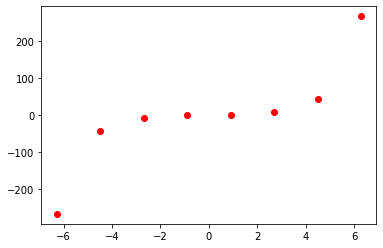

In [10]:
# Data Points
x = np.linspace(-360,360,8) * np.pi/180
y = np.sinh(x)

plt.plot(x, y, 'ro');

In [11]:
class Newton_poly:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.D = None
        self.n = len(self.x) - 1
        
    def divided_differences(self):
        n = self.n
        self.D = np.zeros((n+1,n+1))
        self.D[:,0] = self.y
        
        for j in range(n):
            for i in range(j+1, n+1):
                self.D[i][j + 1] = (self.D[i][j] - self.D[j][j]) / (self.x[i] - self.x[j])        

        return self.D
    
    def interpolate(self, Xp):
        if self.D is None:
            self.divided_differences()
        
        Yp = []
        n = self.n

        for xp in Xp:    
            yp = self.D[0,0]    
            for i in range(n):
                xprod = 1
                for j in range(i+1):
                    xprod *= xp - self.x[j]
                yp += xprod * self.D[i+1, i+1]
            Yp.append(yp)
            
        return Yp

In [12]:
newton_method = Newton_poly(x, y)
D = newton_method.divided_differences()
D

array([[-2.67744894e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-4.44656022e+01,  1.24376010e+02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-7.35259891e+00,  7.25247616e+01, -2.88833390e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-1.02307727e+00,  4.95251115e+01, -2.08475585e+01,
         4.47626964e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.02307727e+00,  3.74287823e+01, -1.61444280e+01,
         3.54805613e+00, -5.17054190e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 7.35259891e+00,  3.06481881e+01, -1.30525905e+01,
         2.93946552e+00, -4.28032452e-01,  4.95888740e-02,
         0.00000000e+00,  0.00000000e+00],
       [ 4.44656022e+01,  2.898574

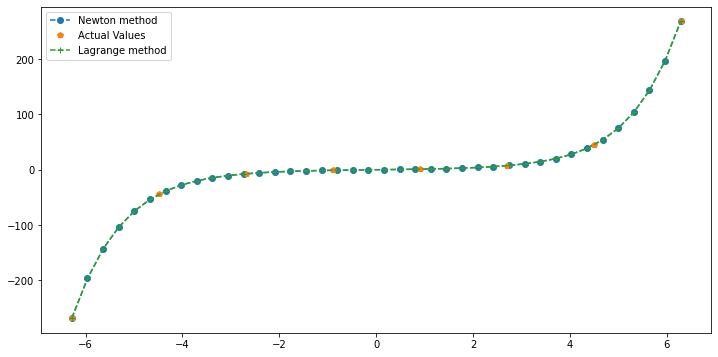

In [13]:
Xp = np.linspace(-360,360,40) * np.pi/180
newton_method = Newton_poly(x, y)

D = newton_method.divided_differences()
Yp = newton_method.interpolate(Xp)

plt.figure(figsize=(12,6))
plt.plot(Xp, Yp, 'o--', label='Newton method')
plt.plot(x, y, 'p', label='Actual Values')
plt.plot(Xp, lagrange_poly(Xp, x, y), '+--', label='Lagrange method')
plt.legend();

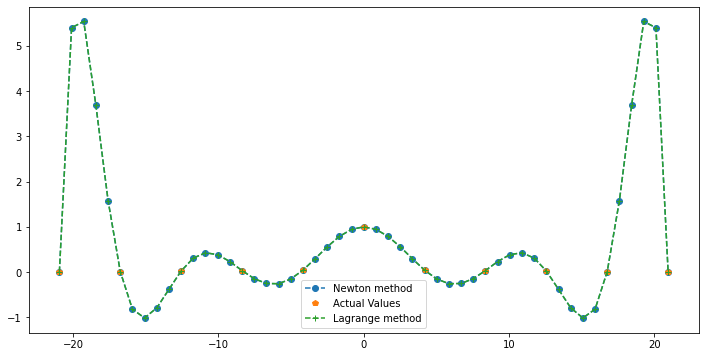

In [14]:
x = np.linspace(-1200, 1200, 11)*np.pi/180
y = np.sinc(x)

Xp = np.linspace(-1200, 1200,51) * np.pi/180
newton_method = Newton_poly(x, y)

D = newton_method.divided_differences()
Yp = newton_method.interpolate(Xp)

plt.figure(figsize=(12,6))
plt.plot(Xp, Yp, 'o--', label='Newton method')
plt.plot(x, y, 'p', label='Actual Values')
plt.plot(Xp, lagrange_poly(Xp, x, y), '+--', label='Lagrange method')
plt.legend();

-------
---
---


## Linear Curve Fitting (Linear Regression)

Linear curve fitting, also known as **linear regression**, is a method for finding the best linear relationship between a dependent variable *y* and one or more independent variables *x*. The goal is to find the equation of a straight line that best fits the given data points, e.i. ***with least deviation from the points***.   
Thus, the main difference between interpolation and curve fitting is that the latter does not have to coincide all given data points

The equation of a straight line is given by:
$$ y = m x + b$$

where $m$ is the slope of the line, $b$ is the y-intercept, and $x$ and $y$ are the independent and dependent variables, respectively.

To find the best-fit line, we need to find the values of $\beta$ and $\epsilon$ that *minimize the sum of the squared differences* between the predicted values of y, $\hat y$, and the actual values of y for each input value of x. This method is known as the method of ***least squares***.

we have to minmize the equation below,

$$ minimize \sum\limits_{i=1}^{n} (y_i - mx_i - b)^2
$$

one can find
$$
m = \frac{\sum\limits_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum\limits_{i=1}^{n} (x_i - \bar{x})^2}
$$

and
$$
b = \bar{y} - m\bar{x}
$$

where $$ \bar x = \frac{1}{n} \sum\limits_{i=1}^{n} {x_i},\space \bar y = \frac{1}{n} \sum\limits_{i=1}^{n}{y_i}$$

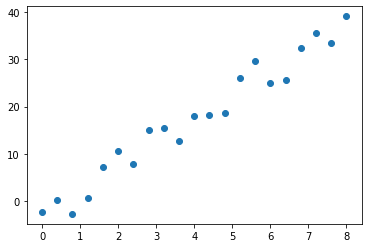

In [15]:
# data point
np.random.seed(101)
x = np.linspace(0, 8, 21)
y = 5 * x - 10 + ((6 + 3) * np.random.random_sample(21) + 3)

plt.plot(x, y, 'o');

In [16]:
def linear_reg(x, y, Xp):
    n = len(x)
    m = 0
    mean_x = sum(x)/n
    mean_y = sum(y)/n
    
    
    m = sum((x - mean_x)*(y - mean_y)) / sum((x - mean_x)**2) 
    b = mean_y - m * mean_x
    print('m =', round(m, 6), ', b =', round(b, 6))
    return Xp * m + b

m = 5.071371 , b = -2.842211


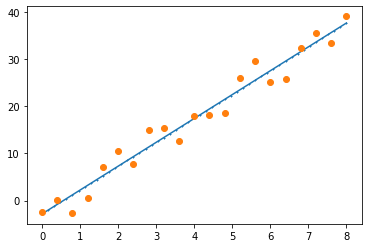

In [17]:
Xp = np.linspace(0, 8, 51)
Yp = linear_reg(x, y, Xp)

plt.plot(Xp, Yp, '+-', ms=2)
plt.plot(x, y, 'o');

In [18]:
## checking
np.polyfit(x, y, 1)

array([ 5.07137084, -2.8422106 ])

Same! 

-------

## Polynomial Curve Fitting

Fitting with a **polynomial curve** involves finding the best-fitting curve that represents the relationship between two variables, typically an independent variable (*x*) and a dependent variable (*y*). A polynomial curve is a curve that is defined by a polynomial equation of degree **n**, where n is the highest power of x in the equation.

Polynomial Eq.: $$ y = b_0 + b_1 x + b_2 x^2 + \dots + b_n x^n $$

This can be expressed in a Matrix format like this: 

$$ A|\text{x}\rangle = |\text{B}\rangle $$

If a set of data containing **m** points is to be fitted by the polynomial curve of degree **n**, a system of linear equations is formulated to compute values of the coefficients

$$
B = \begin{pmatrix} \sum y_i\\ \sum x_iy_i\\ \sum x^2_iy_i \\ \vdots \\ \sum x^n_iy_i \end{pmatrix}, A = \begin{pmatrix}
m & \sum\limits_{i=0}^{n} x_i & \sum\limits_{i=0}^{n} x_i^2 & \cdots & \sum\limits_{i=0}^{n} x_i^{n} \\
\sum\limits_{i=0}^{n} x_i & \sum\limits_{i=0}^{n} x_i^2 & \sum\limits_{i=0}^{n} x_i^3 & \cdots & \sum\limits_{i=0}^{n} x_i^{n+1} \\
\sum\limits_{i=0}^{n} x_i^2 & \sum\limits_{i=0}^{n} x_i^3 & \sum\limits_{i=0}^{n} x_i^4 & \cdots & \sum\limits_{i=0}^{n} x_i^{n+2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum\limits_{i=0}^{n} x_i^{n} & \sum\limits_{i=0}^{n} x_i^{n+1} & \sum\limits_{i=0}^{n} x_i^{n+2} & \cdots & \sum\limits_{i=0}^{n} x_i^{2n}
\end{pmatrix}
$$

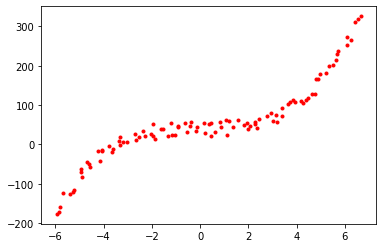

In [19]:
# DATA POINTS
np.random.seed(101)
x = (np.linspace(-360, 360, 101) + ((10 + 8) * np.random.random_sample(101) + 10)) * np.pi / 180
y = x**3 + ((20 + 20) * np.random.random_sample(101) + 20)

plt.plot(x, y, 'ro', ms=3);

In [20]:
def poly_fit(x, y, deg):
    if len(x) != len(y):
        raise ValueError("x and y must have the same length")

    n = deg
    A = np.zeros((n+1, n+1))
    B = np.zeros(n+1)

    for i in range(n+1):
        A[i,:] = np.sum(x[:,np.newaxis]**(i+np.arange(n+1)), axis=0) # each row of matrix A
        B[i] = np.sum(y * x**i)

    return np.linalg.solve(A, B)

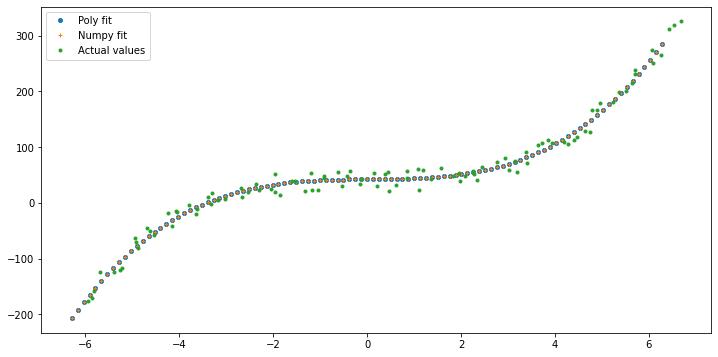

In [21]:
def f(x, a):
    y = 0
    for i in range(len(a)):
        y += a[i] * x**i
    return y


a = poly_fit(x, y, 3)

a_np = np.polyfit(x, y, 3)

xp = np.linspace(-360, 360, 101) * np.pi / 180

plt.figure(figsize=(12,6))
plt.plot(xp, f(xp, a), 'o', ms=4, label='Poly fit')
plt.plot(xp, np.polyval(a_np, xp), '+',ms=4, label='Numpy fit')
plt.plot(x, y, 'o',ms=3, label='Actual values')
plt.legend();

--------

## SciPy Interpolation

`scipy.interpolate` provides a number of functions for interpolation:

* `interp1d`: 1-D interpolation function based on linear, quadratic, or cubic splines.  

* `lagrange`: The lagrange function is used to perform polynomial interpolation using Lagrange polynomials.
  
* `interp2d`: 2-D interpolation function based on linear or cubic splines.  

* `griddata`: Interpolates unstructured data points (x,y) to a regular grid.  

* `SmoothBivariateSpline`: 2-D smoothing spline for noisy data.  

* `RectBivariateSpline`: 2-D interpolation function based on tensor product of B-splines.  

* `RegularGridInterpolator`: Multidimensional interpolation on a regular grid.  


In [22]:
from scipy import interpolate

In [23]:
# help(interpolate)

In [24]:
X = [0,4,8,12,16,20]
Y = [20,16,22,28,24,18]

f = interpolate.interp1d(X, Y, kind='linear') # cubic or quadratic

print("Scipy:",f([0, 2, 4, 6, 8, 14, 16, 20])) # scipy func
print("Our func:",linear_interpolate([0, 2, 4, 6, 8, 14, 16, 20], X, Y)) # our functions

Scipy: [20. 18. 16. 19. 22. 26. 24. 18.]
Our func: [20.0, 18.0, 16.0, 19.0, 22.0, 26.0, 24.0, 18.0]


In [25]:
### Lagrange:
# Parameters
# ----------
# x : array_like
#     `x` represents the x-coordinates of a set of datapoints.
# w : array_like
#     `w` represents the y-coordinates of a set of datapoints, i.e., f(`x`).
x = np.linspace(-360, 360, 11)*np.pi/180
y = np.sinc(x)

L = interpolate.lagrange(x, y)

print(L)

            10             9             8             7          6
-1.021e-05 x  - 4.016e-20 x + 0.0008766 x - 3.154e-18 x - 0.0252 x
              5          4             3        2
 + 8.483e-17 x + 0.2854 x + 6.186e-17 x - 1.14 x - 9.221e-17 x + 1


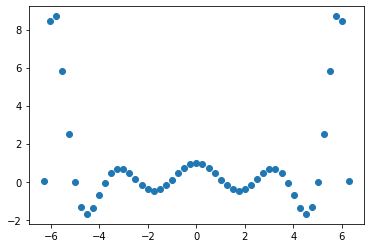

In [26]:
xp = np.linspace(-360, 360, 51)*np.pi/180
plt.plot(xp, L(xp), 'o')

## Scipy Curve-Fitting

* `stats.linregress`
* `optimize.curve_fit`

In [27]:
from scipy.stats import linregress

In [28]:
np.random.seed(101)
x = np.linspace(0, 8, 21)
y = 5 * x - 10 + ((6 + 3) * np.random.random_sample(21) + 3)

L = linregress(x,y)
print('m:', L.slope)
print("y_intercept:", L.intercept)

m: 5.071370836917455
y_intercept: -2.8422105956592105


coefs: [42.20728641  0.62622342 -0.08175448  0.97478702]


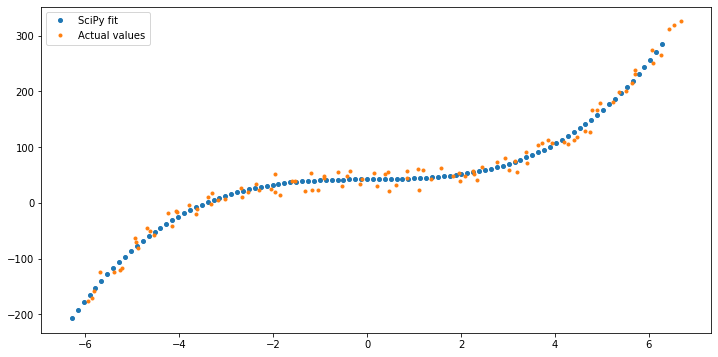

In [29]:
### CURVE_FIT()
# Use non-linear least squares to fit a function, f, to data

np.random.seed(101)
x = (np.linspace(-360, 360, 101) + ((10 + 8) * np.random.random_sample(101) + 10)) * np.pi / 180
y = x**3 + ((20 + 20) * np.random.random_sample(101) + 20)

def f(x, a0, a1, a2, a3):
    return a0 + a1*x + a2*x**2 + a3*x**3

from scipy.optimize import curve_fit

a,b = curve_fit(f, x, y) 
# a = poly coefficients,
# b = 2D array of the estimated covariance of a
print('coefs:', a)

xp = np.linspace(-360, 360, 101) * np.pi / 180
plt.figure(figsize=(12,6))
plt.plot(xp, f(xp, a[0], a[1], a[2], a[3]), 'o', ms=4, label='SciPy fit')
plt.plot(x, y, 'o',ms=3, label='Actual values')
plt.legend();